# Properties calculations on Multi Axis dataset test

In this notebook, we check the functions of properties.py file for multi axis data

## Step 1: Import libraries

In [1]:
import numpy as np
from caits import visualization as vis
from caits import properties as props
from scipy.signal import square

## Step 2: Initialize dataset

In [2]:
sampling_rate = 1000
duration = 2.0

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Channel 1: pure sine wave, 10 Hz
ch1 = np.sin(2 * np.pi * 10 * t)

# Channel 2: amplitude-modulated sine wave (AM)
modulator = 0.5 * (1 + np.sin(2 * np.pi * 1 * t))  # modulation 1 Hz
ch2 = modulator * np.sin(2 * np.pi * 10 * t)

# Channel 3: square wave
ch3 = square(2 * np.pi * 5 * t)

# Combine to DataFrame
data = np.stack((ch1, ch2, ch3), axis=-1)

data.shape

(2000, 3)

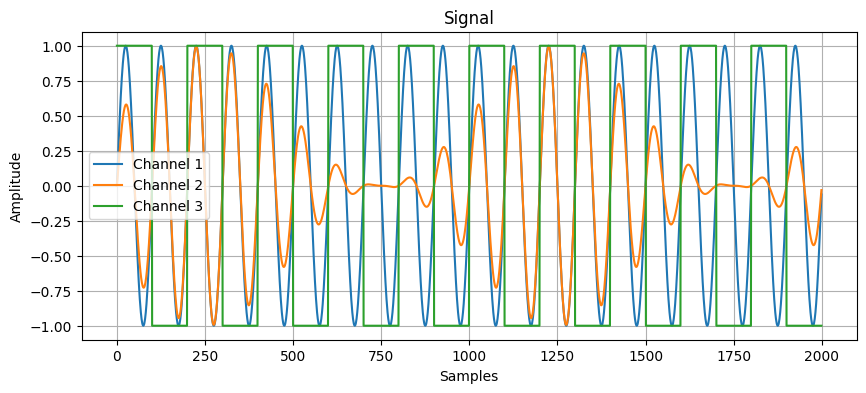

In [3]:
fig = vis.plot_signal(data, sampling_rate)

## Step 3: Ampitude Envelope Hilbert Transform

In [4]:
amp_signals = props.amplitude_envelope_hbt(data, sampling_rate, 0)
amp_signals.shape

(1000, 3)

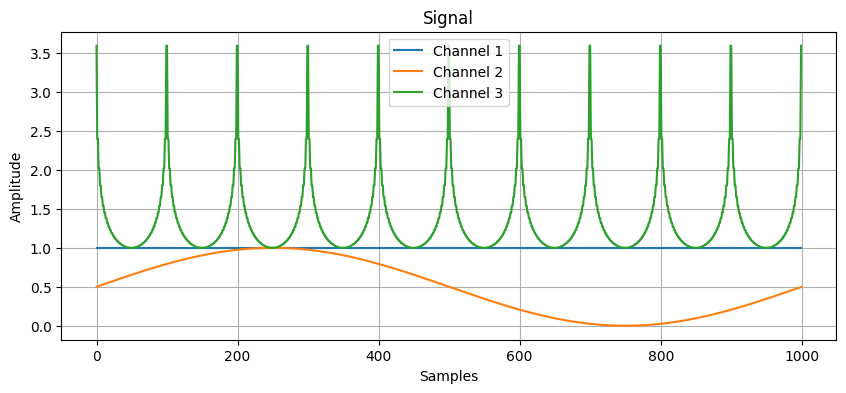

In [5]:
fig = vis.plot_signal(amp_signals, sampling_rate)

## Step 4: Instantaneous Frequency Hilbert Transform

In [6]:
inst_signals = props.instantaneous_frequency_hbt(data, sampling_rate, axis=0)
inst_signals.shape

(1999, 3)

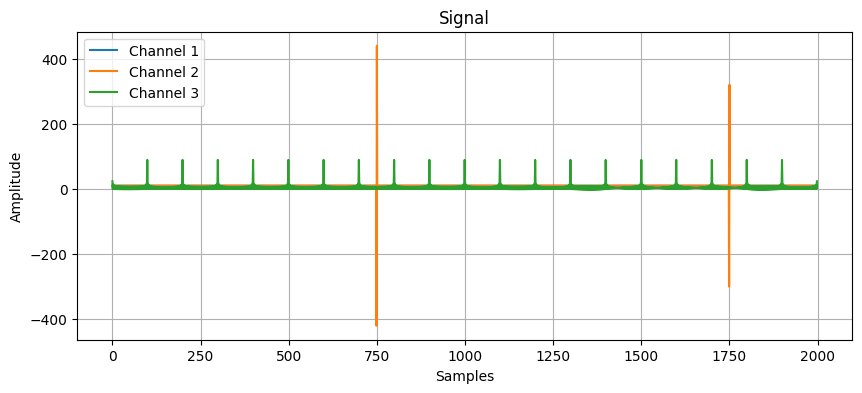

In [7]:
fig = vis.plot_signal(inst_signals, sampling_rate)

## Step 5: Instantaneous Amplitude Hilbert Transform

In [8]:
inst_amps = props.instantaneous_amplitude_hbt(data, axis=0)
inst_amps.shape

(2000, 3)

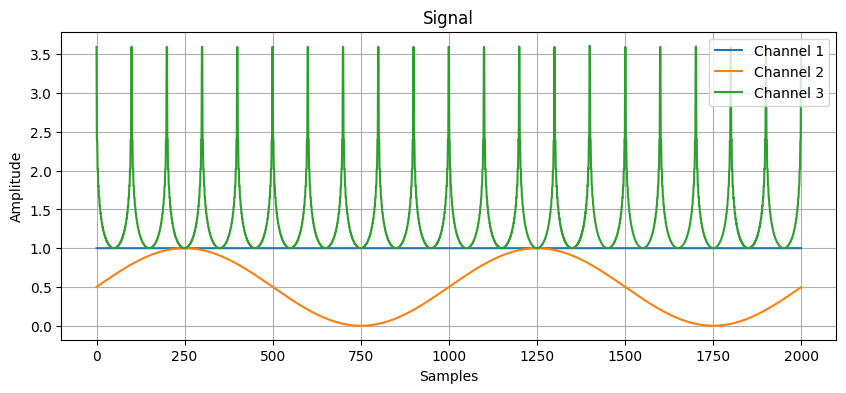

In [9]:
fig = vis.plot_signal(inst_amps, sampling_rate)

## Step 6: SMA

In [10]:
sma = props.sma_signal(data, axis=1)
sma.shape

(2000,)

In [11]:
sma

array([1.        , 1.09438304, 1.18878732, ..., 1.27930605, 1.18721238,
       1.09398852])

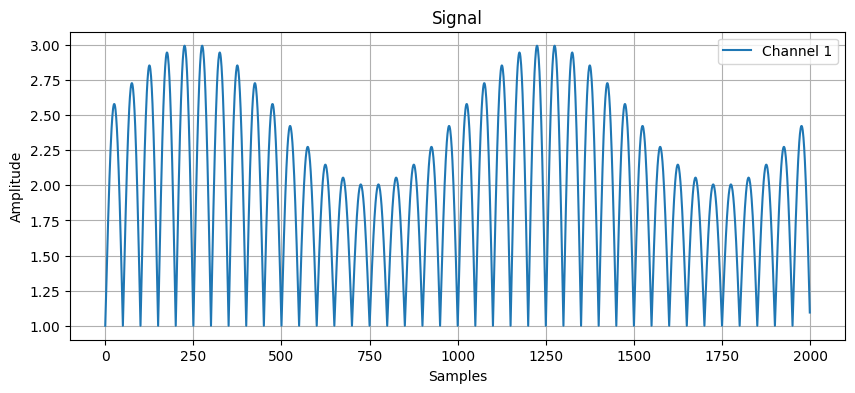

In [12]:
fig = vis.plot_signal(sma, sampling_rate)

a## Step 7: Magnitudes

In [13]:
mag = props.magnitude_signal(data, axis=1)
mag.shape

(2000,)

In [14]:
mag

array([1.        , 1.00246732, 1.00981921, ..., 1.02154878, 1.00972147,
       1.00245497])

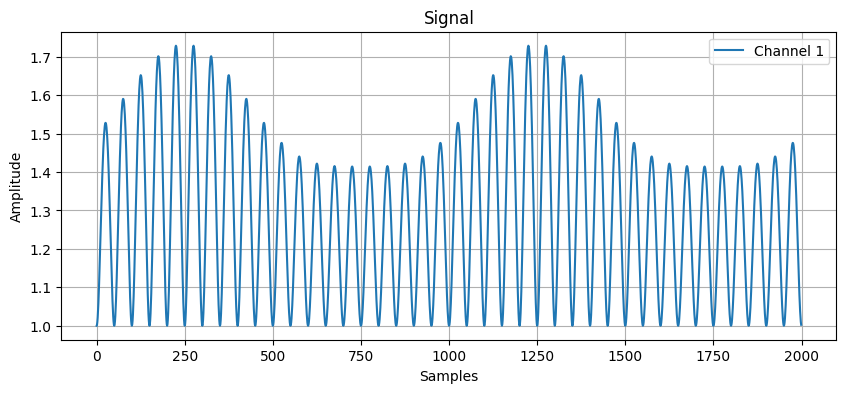

In [15]:
fig = vis.plot_signal(mag, sampling_rate)

## Step 8: Rolling RMS

In [16]:
rmss = props.rolling_rms(data, 50, 10)
rmss.shape

(201, 3)

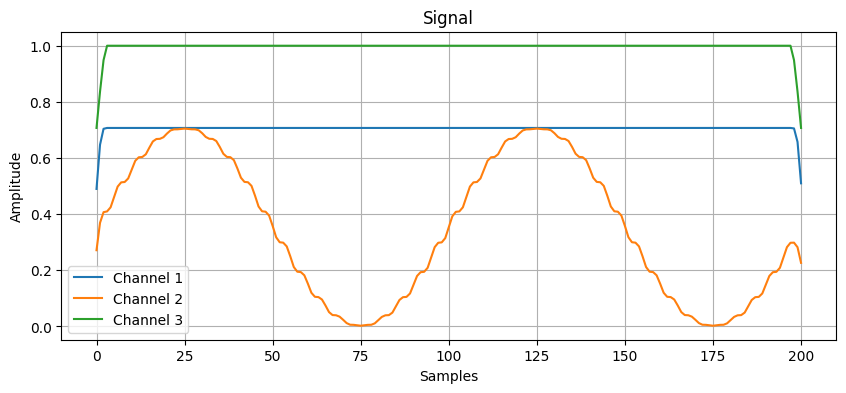

In [17]:
fig = vis.plot_signal(rmss, 1)

## Step 9: Rolling ZCR

In [18]:
zcrs = props.rolling_zcr(data, frame_length=50, hop_length=10)
zcrs.shape

(201, 3)

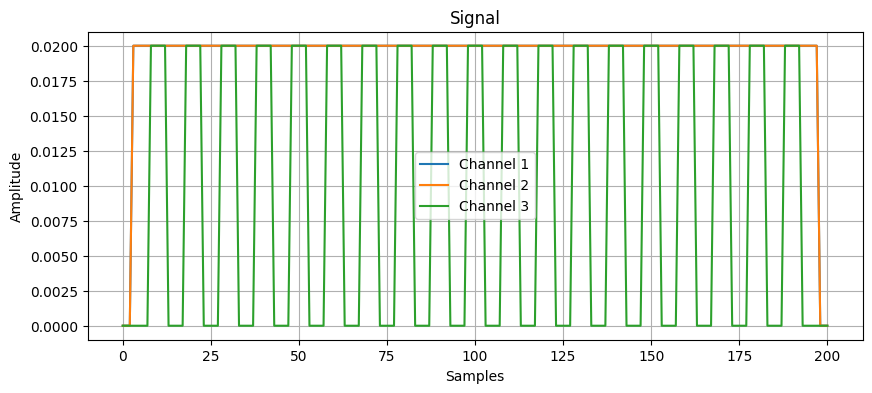

In [19]:
fig = vis.plot_signal(zcrs, 1)

## Test for uni-axis

In this section, we check Rolling RMS and Rolling ZCR on uni-axis for convenience purposes.

In [20]:
data_1d = data[:, 2]
# data_1d.shape

rms_1d = props.rolling_rms(data_1d, frame_length=50, hop_length=10)
rms_1d.shape



(201,)

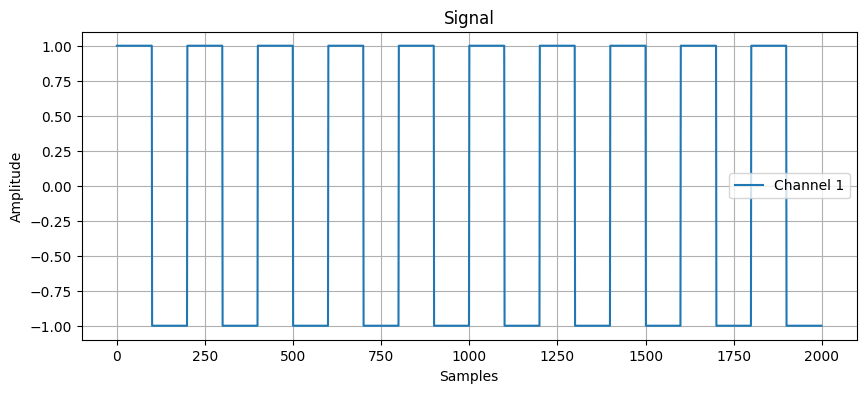

In [21]:

fig = vis.plot_signal(data_1d, sampling_rate)

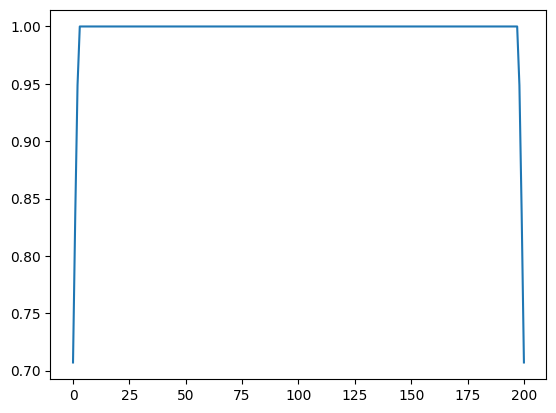

In [22]:
import matplotlib.pyplot as plt

plt.plot(rms_1d)

In [23]:
zcr_1d = props.rolling_zcr(data_1d, frame_length=50, hop_length=10)
zcr_1d.shape

(201,)

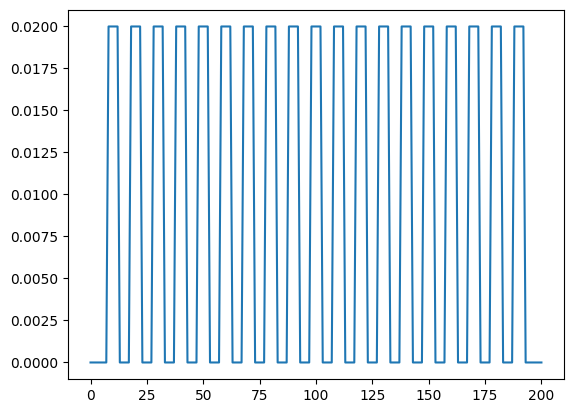

In [24]:
plt.plot(zcr_1d)

# Step 10: Real-world data

In [25]:
from utils import load_csv_instance
MOTION_FREQUENCY = 100  # Hz

In [26]:
motion = load_csv_instance("data/scratching_eye.csv")

In [27]:
motion["signal"].shape

(1034, 6)

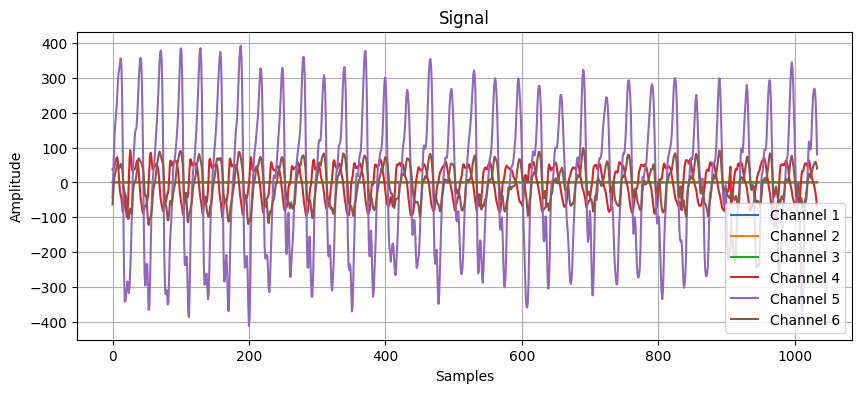

In [28]:
fig = vis.plot_signal(motion["signal"], sr=MOTION_FREQUENCY)

## SMA

In [29]:
sma_motion = props.sma_signal(motion["signal"], axis=1)

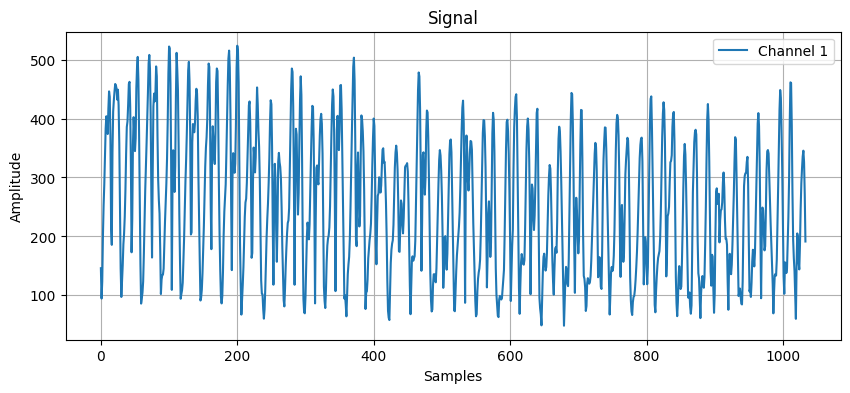

In [30]:
fig = vis.plot_signal(sma_motion, sr=MOTION_FREQUENCY)

## Magnitude

In [31]:
magnitude_motion = props.magnitude_signal(motion["signal"], axis=1)

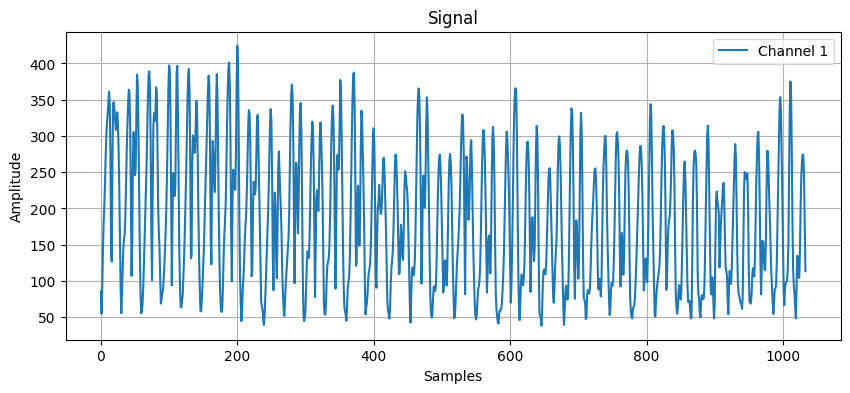

In [32]:
fig = vis.plot_signal(magnitude_motion, sr=MOTION_FREQUENCY)